[[2, 215], [4, 271], [3, 418], [11, 114], [16, 50], [19, 447], [17, 482], [19, 450], [20, 292], [20, 396], [22, 26], [23, 6], [23, 221], [23, 250], [27, 345], [29, 416], [30, 584], [36, 440], [36, 472], [40, 78], [43, 98], [46, 123], [50, 173], [47, 4], [49, 7], [48, 238], [48, 244], [52, 248], [51, 241], [52, 244], [54, 598], [54, 406], [58, 380], [60, 454], [62, 272], [65, 574], [74, 476], [77, 244], [83, 400], [84, 18], [84, 298], [88, 114], [89, 176], [91, 197], [95, 452], [96, 529], [100, 547], [107, 232], [112, 18], [115, 464], [119, 597], [119, 306], [123, 442], [124, 546], [130, 282], [131, 72], [138, 232], [140, 577], [141, 465], [144, 448], [144, 515], [149, 253], [158, 43], [159, 16], [164, 479], [172, 120], [173, 30], [181, 492], [184, 584], [184, 287], [196, 353], [196, 4], [196, 549], [200, 120], [202, 39], [206, 278], [206, 148], [219, 570], [223, 546], [226, 301], [231, 340], [240, 8], [241, 321], [242, 526], [256, 542], [259, 296], [265, 321], [282, 2], [284, 578], [28

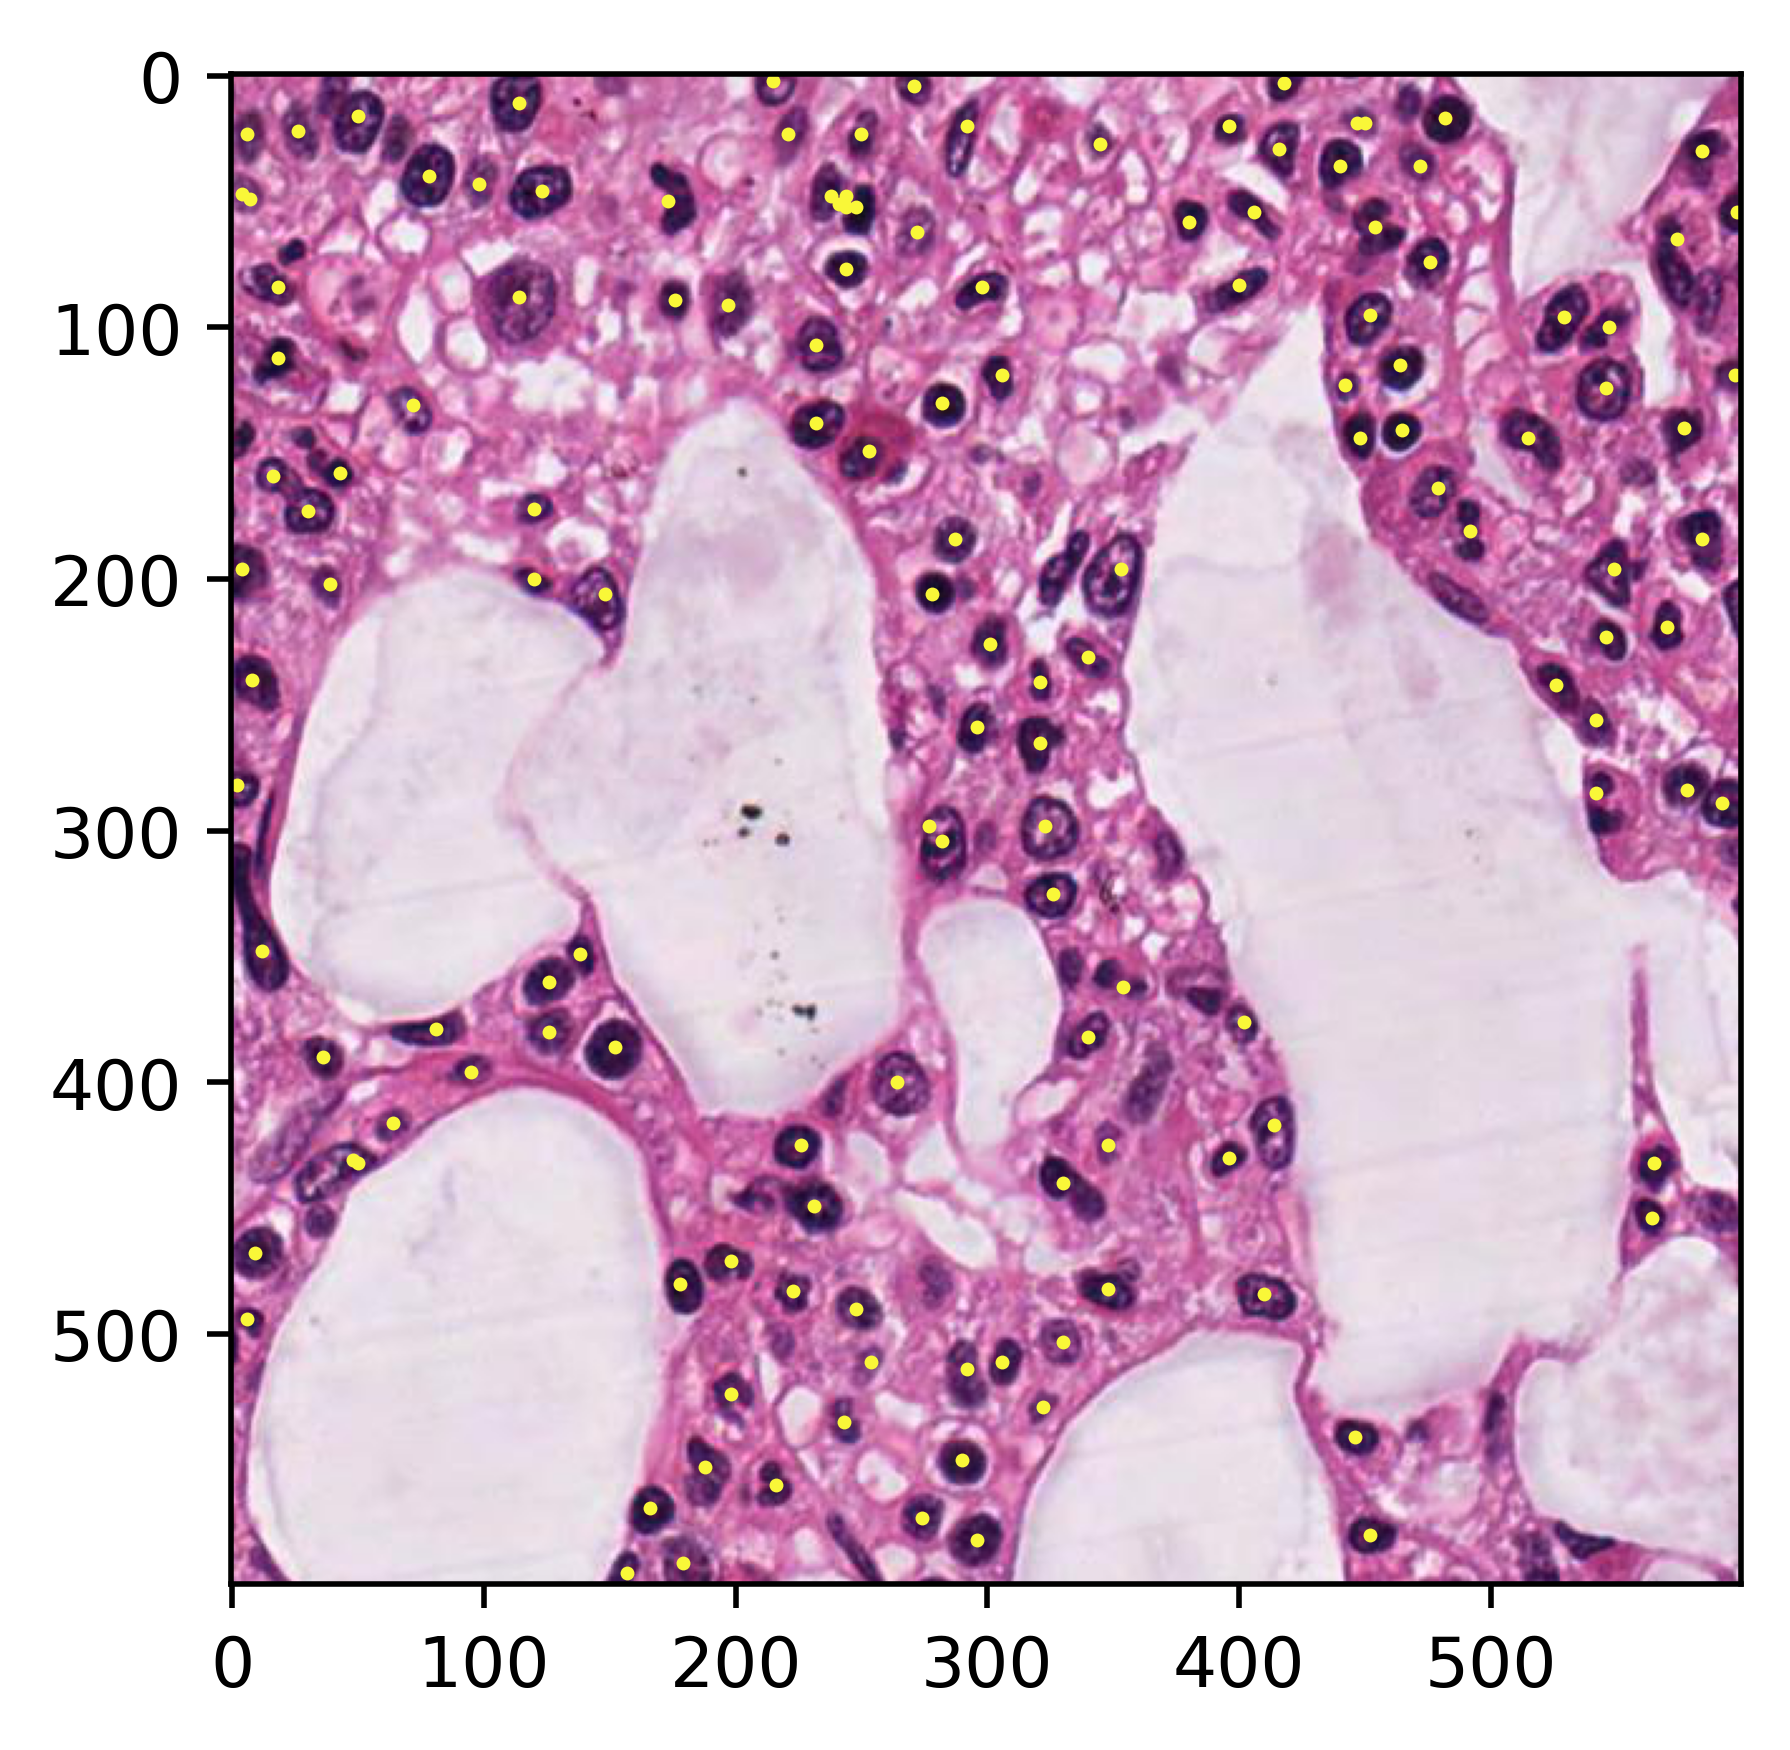

In [3]:
import torch
from model import UNet
import utils
import torchvision.transforms as T
import numpy as np
import matplotlib.pyplot as plt

localizationWeights = r'../checkpoints/MBM/epoch_10.pth.tar'


def detect(srcImgPath):
    model = UNet(2).to(utils.device())
    model.load_state_dict(torch.load(localizationWeights, map_location=utils.device())['state_dict'])
    model.eval()

    image = utils.read_image(srcImgPath)
    transform = T.Compose([T.ToTensor(), T.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    x = transform(image).unsqueeze(0)
    points = None
    with torch.no_grad():
        x = x.to(utils.device())
        pred = utils.ensure_array(model(x)).squeeze(0)
        points = utils.extract_points_from_direction_field_map(pred, lambda1=0.7, step=10)
    
    print(points)
    image_array = np.array(image)
    plt.figure(dpi=500)
    plt.imshow(image_array)
    # plt.axis('off')
    points = np.array(points)
    plt.plot(points[:, 1], points[:, 0], marker='o', markerfacecolor='#f9f738', markeredgecolor='none', markersize=2,
             linestyle='none')
    plt.show()

srcImgPath = 'F:/demo/res/img/359067147c464632b4c02d5ea777d44f.jpg'
detect(srcImgPath)